In [2]:
!git clone https://github.com/NgoQuocTinh/multi-tracker-evaluation.git
%cd multi-tracker-evaluation

fatal: destination path 'multi-tracker-evaluation' already exists and is not an empty directory.
/content/multi-tracker-evaluation


In [3]:
!pip install -r requirements.txt

In [ ]:
import os

# Create .kaggle directory if it doesn't exist
os.makedirs('/root/.kaggle', exist_ok=True)

# Move kaggle.json to the correct directory if it's in /content/
# Check if kaggle.json exists in /content/ and move it
if os.path.exists('/content/kaggle.json'):
    !mv /content/kaggle.json /root/.kaggle/kaggle.json
    !chmod 600 /root/.kaggle/kaggle.json
    print("kaggle.json moved to /root/.kaggle/")
elif os.path.exists('/root/.kaggle/kaggle.json'):
    !chmod 600 /root/.kaggle/kaggle.json
    print("kaggle.json already in /root/.kaggle/")
else:
    print("Please upload kaggle.json to your Colab environment.")

kaggle.json moved to /root/.kaggle/


In [ ]:
# Download the dataset
!kaggle datasets download -d ismailelbouknify/mot-20

# Unzip the downloaded file
!unzip mot-20.zip -d mot-20

print("Dataset downloaded and unzipped to the 'mot-20' directory.")

Streaming output truncated to the last 5000 lines.
  inflating: mot-20/MOT20/train/MOT20-03/img1/000726.jpg  
  inflating: mot-20/MOT20/train/MOT20-03/img1/000727.jpg  
  inflating: mot-20/MOT20/train/MOT20-03/img1/000728.jpg  
  inflating: mot-20/MOT20/train/MOT20-03/img1/000729.jpg  
  inflating: mot-20/MOT20/train/MOT20-03/img1/000730.jpg  
  inflating: mot-20/MOT20/train/MOT20-03/img1/000731.jpg  
  inflating: mot-20/MOT20/train/MOT20-03/img1/000732.jpg  
  inflating: mot-20/MOT20/train/MOT20-03/img1/000733.jpg  
  inflating: mot-20/MOT20/train/MOT20-03/img1/000734.jpg  
  inflating: mot-20/MOT20/train/MOT20-03/img1/000735.jpg  
  inflating: mot-20/MOT20/train/MOT20-03/img1/000736.jpg  
  inflating: mot-20/MOT20/train/MOT20-03/img1/000737.jpg  
  inflating: mot-20/MOT20/train/MOT20-03/img1/000738.jpg  
  inflating: mot-20/MOT20/train/MOT20-03/img1/000739.jpg  
  inflating: mot-20/MOT20/train/MOT20-03/img1/000740.jpg  
  inflating: mot-20/MOT20/train/MOT20-03/img1/000741.jpg  
  inf

In [ ]:
# Create video from img
import cv2
import os
import glob

sequence = "/content/multi-tracker-evaluation/mot-20/MOT20/train/MOT20-01/img1"
output_video = "/content/multi-tracker-evaluation/data/video_1.mp4"

img_files = sorted(glob.glob(sequence + "/*.jpg"))
frame = cv2.imread(img_files[0])
h, w, _ = frame.shape

fourcc = cv2.VideoWriter_fourcc(*"mp4v")
video = cv2.VideoWriter(output_video, fourcc, 25, (w, h))

for f in img_files:
    video.write(cv2.imread(f))

video.release()
print("DONE: video saved to", output_video)


DONE: video saved to /content/multi-tracker-evaluation/data/video_1.mp4


In [ ]:
# Copy gt to data folder
!cp /content/multi-tracker-evaluation/mot-20/MOT20/train/MOT20-01/gt/gt.txt /content/multi-tracker-evaluation/data/gt.txt
!head data/gt.txt

1,1,199,813,140,268,1,1,0.83643
2,1,201,812,140,268,1,1,0.84015
3,1,203,812,140,268,1,1,0.84015
4,1,206,812,140,268,1,1,0.84015
5,1,208,812,140,268,1,1,0.84015
6,1,211,812,140,268,1,1,0.84015
7,1,214,812,140,268,1,1,0.84015
8,1,217,812,140,268,1,1,0.84015
9,1,220,812,140,268,1,1,0.84015
10,1,223,812,140,268,1,1,0.84015


In [6]:
!python detect.py

Detections written to data/detections.txt


In [9]:
!python track_bytetrack.py

Running ByteTrack via Ultralytics...
ByteTrack complete. Results saved to results_1/results_bytetrack.txt
ByteTrack tracking completed in 69.89s, FPS: 6.14


In [10]:
!python track_botsort.py

Running BOTSort via Ultralytics...
BOTSort complete. Results saved to results_1/results_botsort.txt
BOTSORT tracking completed in 86.49s, FPS: 4.96


In [11]:
!python track_deepsort.py

Starting DeepSORT tracking. Results will be written to results_1/results_deepsort.txt
DeepSORT tracking complete. Results saved to results_1/results_deepsort.txt
DeepSORT tracking completed in 326.79s, FPS: 1.31


In [12]:
!python track_sort.py

Starting SORT tracking. Results will be written to results_1/results_sort.txt
SORT tracking complete. Results saved to results_1/results_sort.txt
SORT tracking completed in 8.61s, FPS: 49.83


In [13]:
!python evaluate.py

Loading ground truth...

Processing tracker: DeepSORT

Processing tracker: BOTSort

Processing tracker: ByteTrack

Processing tracker: SORT

Comparative Tracker Evaluation Metrics:
  Tracker     MOTA     MOTP  ID Switches  Fragmentations  Mostly Tracked (%)  Mostly Lost (%)  Average Track Length  Estimated ID Switches  Runtime (s)   FPS
 DeepSORT 0.296919 0.144749           51              60                  15               44            119.531646                      0       326.79  1.31
  BOTSort 0.204789 0.079609           68             360                   9               58             51.727273                    316        86.49  4.96
ByteTrack 0.204076 0.082780           78             364                   8               57             48.538462                    312        69.89  6.14
     SORT 0.183248 0.069022           43             227                   7               64             60.759036                    204         8.61 49.83


In [14]:
import pandas as pd
df = pd.read_csv("evaluation_results_1/tracker_comparison.csv")
df

,Tracker,MOTA,MOTP,ID Switches,Fragmentations,Mostly Tracked (%),Mostly Lost (%),Average Track Length,Estimated ID Switches,Runtime (s),FPS
0,DeepSORT,0.296919,0.144749,51,60,15,44,119.531646,0,326.79,1.31
1,BOTSort,0.204789,0.079609,68,360,9,58,51.727273,316,86.49,4.96
2,ByteTrack,0.204076,0.082780,78,364,8,57,48.538462,312,69.89,6.14
3,SORT,0.183248,0.069022,43,227,7,64,60.759036,204,8.61,49.83


/tmp/ipython-input-3391422075.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tracker', y=metric, data=df, palette='Set2', ax=axes[i])
/tmp/ipython-input-3391422075.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tracker', y=metric, data=df, palette='Set2', ax=axes[i])
/tmp/ipython-input-3391422075.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tracker', y=metric, data=df, palette='Set2', ax=axes[i])
/tmp/ipython-input-3391422075.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

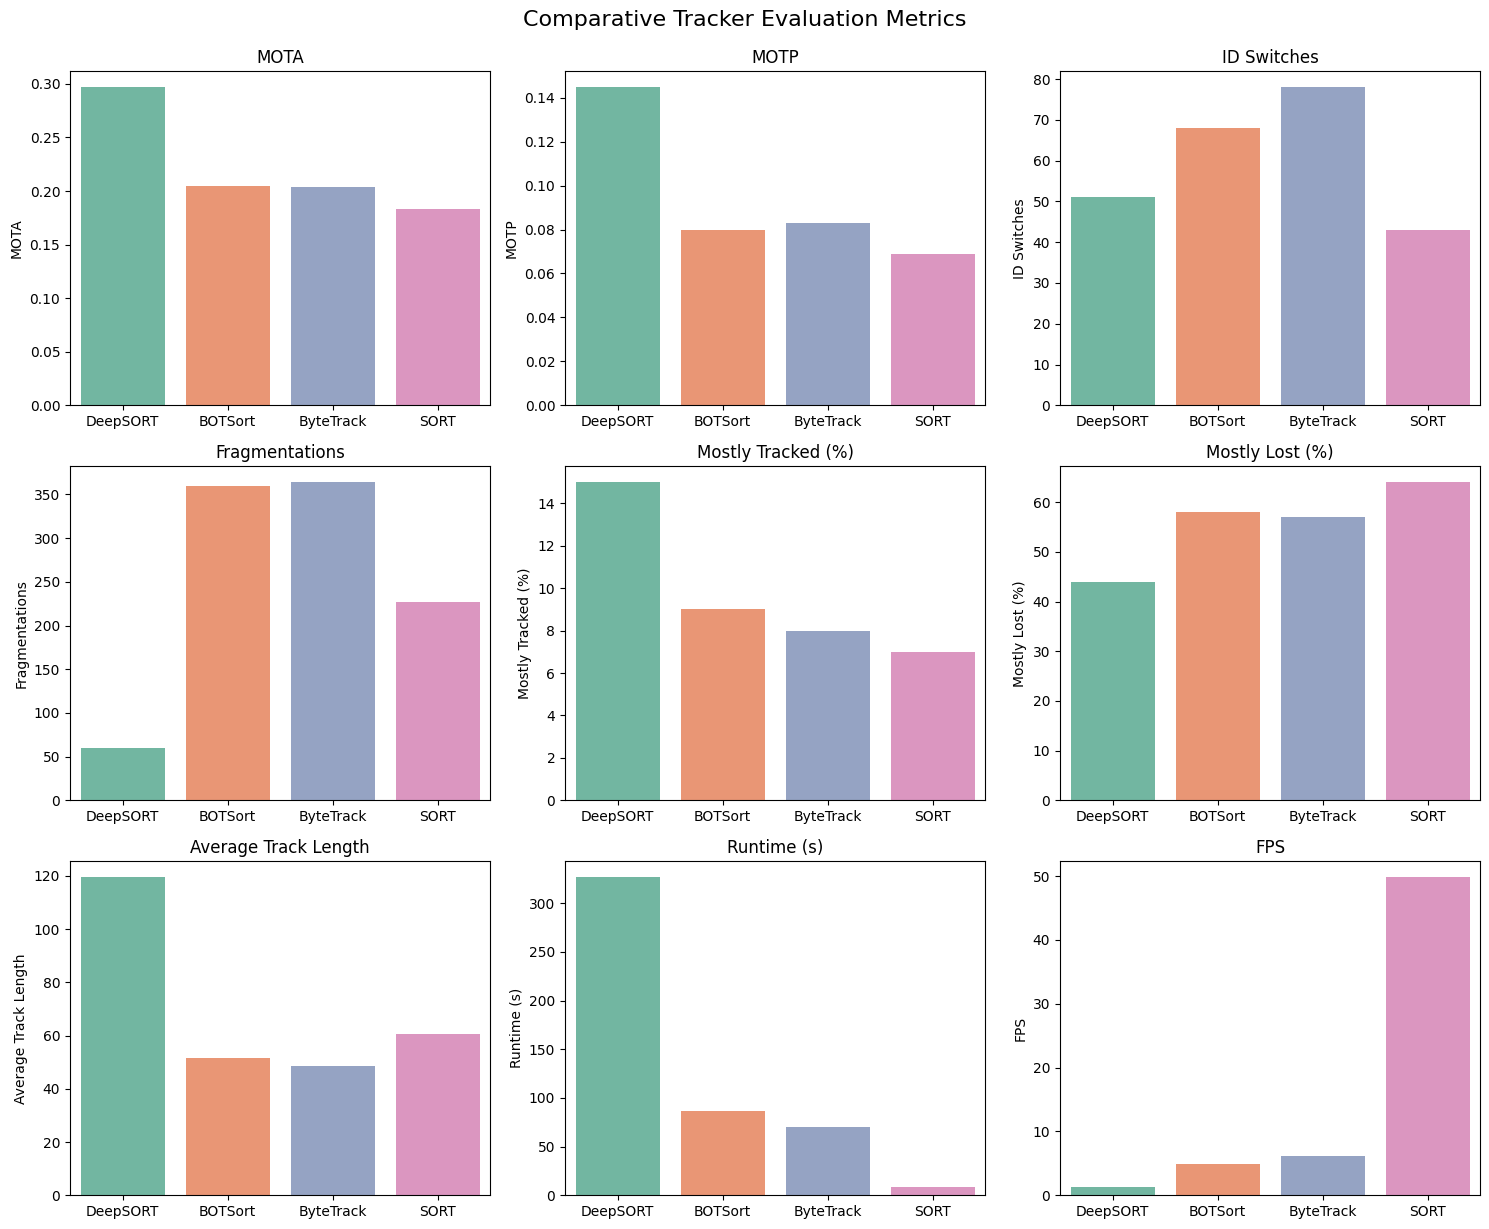

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CONFIG
CSV_FILE = 'evaluation_results_1/tracker_comparison.csv'
OUTPUT_FOLDER = 'evaluation_results_1/plots'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)
OUTPUT_FILE = os.path.join(OUTPUT_FOLDER, 'tracker_metrics_summary.png')

# LOAD DATA
df = pd.read_csv(CSV_FILE)

# METRICS TO PLOT
metrics = [
    ('MOTA', 'MOTA'),
    ('MOTP', 'MOTP'),
    ('ID Switches', 'ID Switches'),
    ('Fragmentations', 'Fragmentations'),
    ('Mostly Tracked (%)', 'Mostly Tracked (%)'),
    ('Mostly Lost (%)', 'Mostly Lost (%)'),
    ('Average Track Length', 'Average Track Length'),
    ('Runtime (s)', 'Runtime (s)'),
    ('FPS', 'FPS')
]

n_metrics = len(metrics)
cols = 3
rows = (n_metrics + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for i, (metric, ylabel) in enumerate(metrics):
    sns.barplot(x='Tracker', y=metric, data=df, palette='Set2', ax=axes[i])
    axes[i].set_title(ylabel)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(ylabel)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Comparative Tracker Evaluation Metrics', fontsize=16, y=1.02)
plt.savefig(OUTPUT_FILE, bbox_inches='tight')
plt.show()


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import shutil
import os

source_folder = '/content/multi-tracker-evaluation/evaluation_results_1'
destination_folder = '/content/drive/MyDrive/KLTN/evaluation_results_1_yolo11'

try:
    # Check if the destination folder already exists
    if os.path.exists(destination_folder):
        print(f"Destination folder '{destination_folder}' already exists. Deleting it to ensure a clean copy.")
        shutil.rmtree(destination_folder)

    shutil.copytree(source_folder, destination_folder)
    print(f"Successfully copied '{source_folder}' to '{destination_folder}'")
except FileNotFoundError:
    print(f"Error: Source folder '{source_folder}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully copied '/content/multi-tracker-evaluation/evaluation_results_1' to '/content/drive/MyDrive/KLTN/evaluation_results_1_yolo11'
